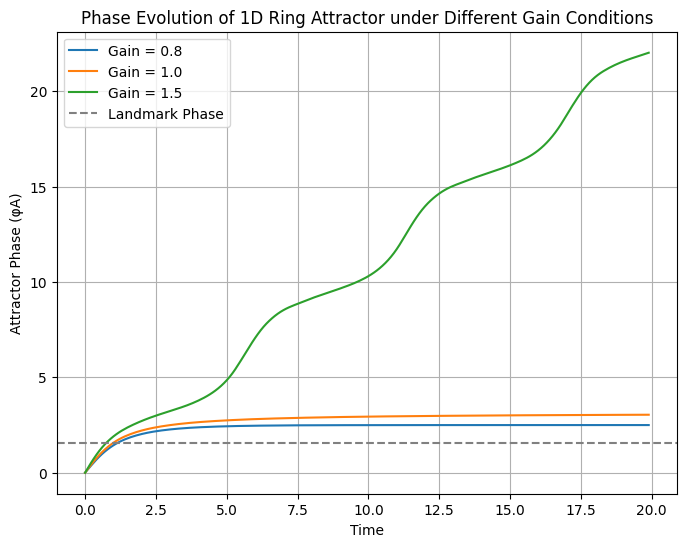

Coherence Scores for Different Gain Conditions:
Gain = 0.8: Coherence = 5.61
Gain = 1.0: Coherence = 3.52
Gain = 1.5: Coherence = 0.43
   Time  Gain 0.8  Gain 1.0  Gain 1.5
0   0.0  0.000000  0.000000  0.000000
1   0.1  0.179463  0.199337  0.248967
2   0.2  0.355706  0.394712  0.491796
3   0.3  0.525901  0.582715  0.723501
4   0.4  0.687900  0.760847  0.940734


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

# parameters for the ring attractor model
k = 1.0  # ccaling factor for velocity to phase change
omega = 1.0  # strength of the landmark influence
v = 1.0  # animal base velocity
gain_factors = [0.8, 1.0, 1.5]
T = 20  # total simulation time
dt = 0.1  # time step

# initial phase
phi_A_0 = 0.0 # attractor phase 
phi_L = np.pi / 2  # landmark phase

# force function (sinusoidal restoring force)
def F(x):
    return np.sin(x)

# differential equation for the attractor phase dynamics
def attractor_dynamics(t, phi_A, v, g, omega, phi_L):
    velocity_input = k * v * g
    landmark_input = omega * F(phi_L - phi_A)
    return velocity_input + landmark_input

# function to simulate phase evolution under different gain conditions
def simulate_ring_attractor(v, gain_factors, T, dt, phi_A_0, phi_L, omega):
    times = np.arange(0, T, dt)
    results = {}
    for g in gain_factors:
        sol = solve_ivp(attractor_dynamics, [0, T], [phi_A_0],
                        args=(v, g, omega, phi_L), t_eval=times)
        results[g] = sol.y[0]
    return times, results

times, results = simulate_ring_attractor(v, gain_factors, T, dt, phi_A_0, phi_L, omega)

plt.figure(figsize=(8, 6))
for g, phi_A in results.items():
    plt.plot(times, phi_A, label=f'Gain = {g}')
plt.axhline(phi_L, color='gray', linestyle='--', label='Landmark Phase')
plt.xlabel('Time')
plt.ylabel('Attractor Phase (φA)')
plt.title('Phase Evolution of 1D Ring Attractor under Different Gain Conditions')
plt.legend()
plt.grid(True)
plt.show()

# coherence metrics 
def calculate_coherence(phi_A, phi_L):
    """Calculate coherence as the inverse of the variance of the phase difference."""
    phase_diff = np.mod(phi_A - phi_L + np.pi, 2 * np.pi) - np.pi
    coherence = 1 / np.var(phase_diff)
    return coherence

coherence_results = {g: calculate_coherence(phi_A, phi_L) for g, phi_A in results.items()}
print("Coherence Scores for Different Gain Conditions:")
for g, coherence in coherence_results.items():
    print(f"Gain = {g}: Coherence = {coherence:.2f}")

result_data = {
    'Time': times
}
for g, phi_A in results.items():
    result_data[f'Gain {g}'] = phi_A

df = pd.DataFrame(result_data)
print(df.head())